In [63]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 1. 탐색적 데이터 분석
- 질적 변수 (명목척도) : 도수분포표, 상대도수분포표, 상관계수, 막대그래프, 파이그래프
- 양적 변수 (수치형 데이터, 등간척도, 비율척도) : 도수분포표, 상대도수분포표, 대푯값, 산포도, 왜도, 첨도, 상관계수, 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도

## 1-1 공통

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv")

# 변수 분류
del_feature = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feature, axis=1)

qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')

## 1-2 질적 변수
### 도수분포표

In [16]:
freq = pd.DataFrame(titanic['Survived'].value_counts())
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq = freq.rename(columns={'count':'도수'})
freq

,도수,상대도수
Survived,,
0,549,0.616162
1,342,0.383838


### 상관관계
- 두 변수 간 순위 상관관계 측정 (H0: 관계가 없다) => 비정규성 데이터, 이상치 민감 X
    - 스피어만 : 데이터 순위 기반하여 순위 간 차이 계산 후 상관관계 $\rho = 1-\frac{6\sum d^2_i}{n(n^2-1)}$
    - 켄달의 타우 : 두 변수 간 순위 쌍 비교로 일관되게 변하는지(+/-의 방향) 측정,  $\tau = \frac{C-D}{_nC_2}$, 일치 순위 쌍 # C, 불일치 순위 쌍 # D
- 연속형 변수 : 피어슨 상관계수

In [38]:
print(stats.pearsonr(titanic['Survived'], titanic['Pclass']))
print(stats.spearmanr(titanic['Survived'], titanic['Pclass']))
print(stats.kendalltau(titanic['Survived'], titanic['Pclass']))

PearsonRResult(statistic=np.float64(-0.3384810359610153), pvalue=np.float64(2.537047387981394e-25))
SignificanceResult(statistic=np.float64(-0.33966793665005257), pvalue=np.float64(1.6876081409966055e-25))
SignificanceResult(statistic=np.float64(-0.32353318439409545), pvalue=np.float64(3.932785644652603e-24))


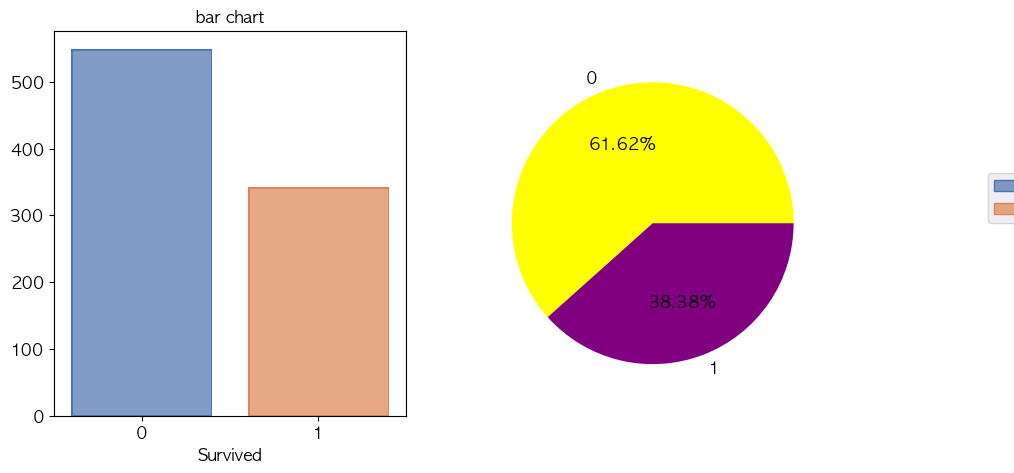

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

so.Plot(x=freq['도수'].index, y=freq['도수'].values, color=['red', 'blue']).add(so.Bar()).on(axes[0]).label(title='bar chart').plot();
axes[1].pie(freq['도수'].values, labels=freq['도수'].index, autopct="%.2f%%", colors=['yellow', 'purple']);

## 1-3 양적변수
### 도수분포표, 상대도수분포표

In [34]:
result2 = pd.cut(titanic['Age'], bins=[0, 20, 40, 60, float('inf')], right=False)
freq2 = pd.DataFrame(result2.value_counts()).reset_index()
freq2 = freq2.rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')
freq2['상대도수'] = freq2['도수'].apply(lambda x : x / freq2['도수'].sum())
freq2

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


In [36]:
# 중위수, 최빈값, 1사분위수, 2사분위수, 3사분위수, 50백분위수, 75백분위수
print(titanic['Fare'].median())
print(titanic['Fare'].mode()[0])
print(titanic['Fare'].quantile(q=0.25))
print(titanic['Fare'].quantile(q=0.5))
print(titanic['Fare'].quantile(q=0.75))
print(np.percentile(titanic['Fare'], 50))
print(np.percentile(titanic['Fare'], 75))

print('range', titanic['Fare'].max() - titanic['Fare'].min())

iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
print('iqr', iqr)

md = np.mean(np.abs(np.array(titanic['Fare'])-np.mean(titanic['Fare'])))
print('평균편차', md)
print('사분편차', iqr/2)

print('모분산', titanic['Fare'].var(ddof=0))
print('표본분산', titanic['Fare'].var(ddof=1))

print('모표준편차', titanic['Fare'].std(ddof=0))
print('표본표준편차', titanic['Fare'].std(ddof=1))

14.4542
8.05
7.9104
14.4542
31.0
14.4542
31.0
range 512.3292
iqr 23.0896
평균편차 28.163691848778342
사분편차 11.5448
모분산 2466.665311685043
표본분산 2469.436845743116
모표준편차 49.6655344447741
표본표준편차 49.6934285971809


### 왜도, 첨도
- 첨도 3 : 정규분포

In [39]:
print('왜도, 첨도')
print(titanic['Fare'].skew(), titanic['Fare'].kurt())
print('bias 차이')
print(stats.skew(titanic['Fare'], bias=False), stats.kurtosis(titanic['Fare'], bias=False))
print(stats.skew(titanic['Fare'], bias=True), stats.kurtosis(titanic['Fare'], bias=True))

왜도, 첨도
4.787316519674893 33.39814088089868
bias 차이
4.787316519674893 33.39814088089869
4.7792532923723545 33.20428925264474


### 양적변수 탐색 시각화

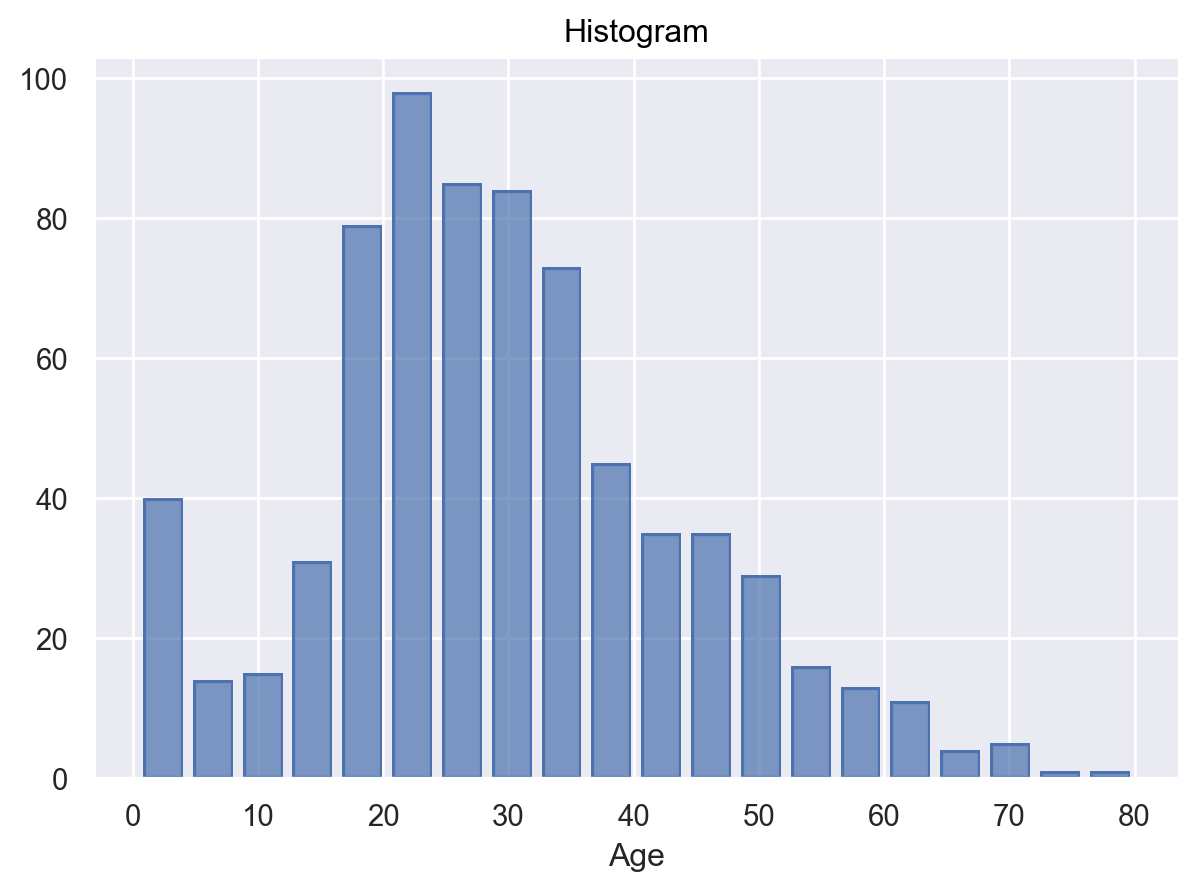

In [53]:
so.Plot(data=titanic, x='Age').add(so.Bar(), so.Hist()).label(title='Histogram').plot()

In [57]:
result1 = pd.cut(titanic['Age'], bins=[i for i in range(0, 90, 10)])
result1.value_counts().reset_index()

,Age,count
0,"(20, 30]",230
1,"(30, 40]",155
2,"(10, 20]",115
3,"(40, 50]",86
4,"(0, 10]",64
5,"(50, 60]",42
6,"(60, 70]",17
7,"(70, 80]",5


         계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  155   564  35.0
3  (40, 50]   86   650  45.0
5  (50, 60]   42   692  55.0
6  (60, 70]   17   709  65.0
7  (70, 80]    5   714  75.0


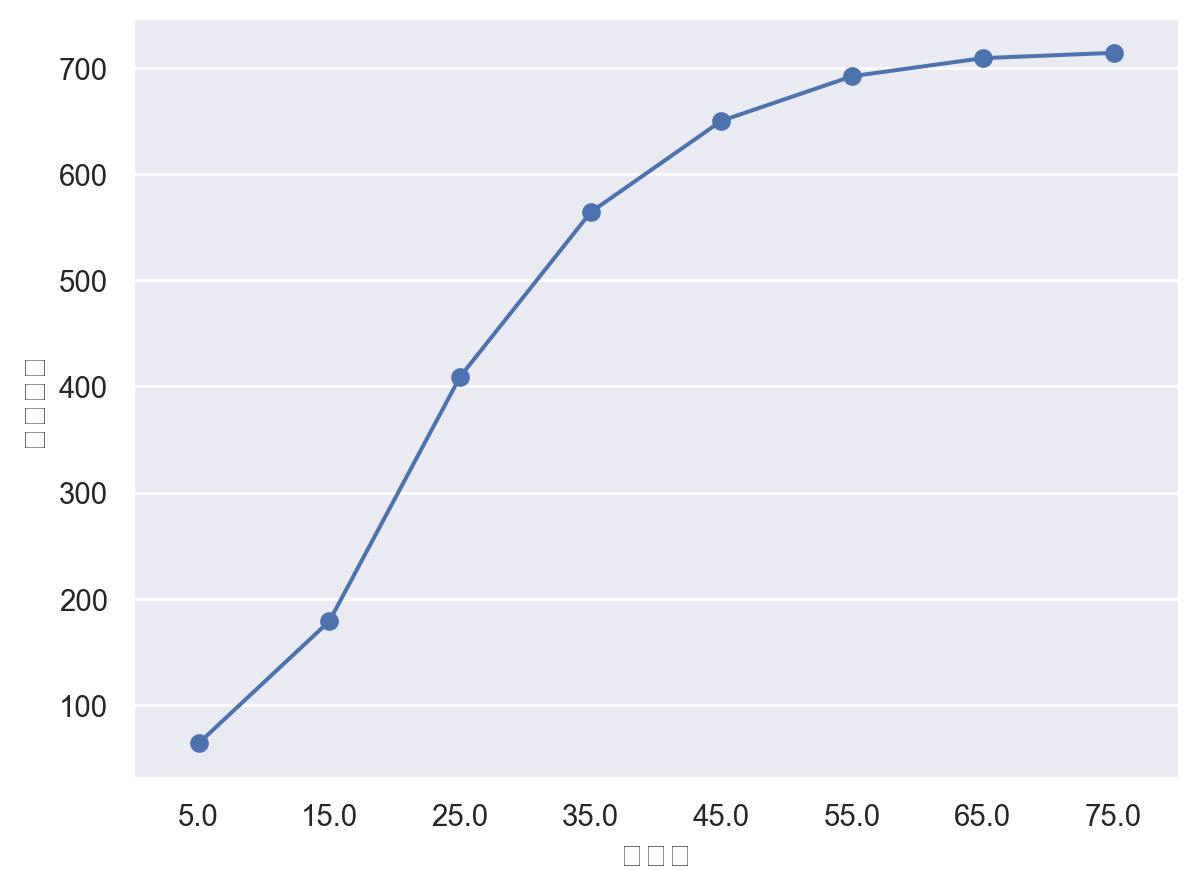

In [64]:
result1 = pd.cut(titanic['Age'], bins=[i for i in range(0, 90, 10)])
freq1 = pd.DataFrame(result1.value_counts()).reset_index().rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')
freq1['누적도수'] = freq1['도수'].cumsum()
freq1['계급값'] = freq1['계급'].apply(lambda x: np.median([x.left, x.right]))
print(freq1)

so.Plot(data=freq1, x='계급값', y='누적도수').add(so.Line(marker='o', color='b')).plot()

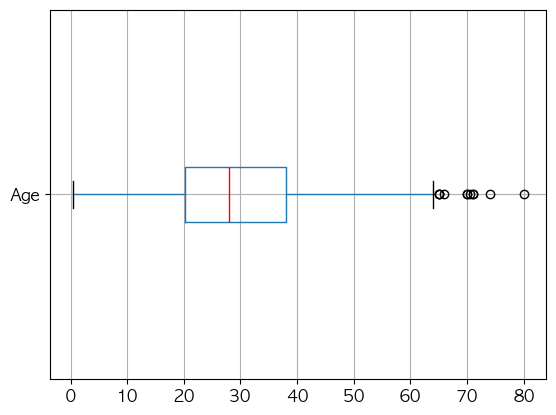

In [69]:
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'});

### 응용

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv")
qual_features = [feat for feat in df.columns if df[feat].dtypes == object]
df[qual_features].describe().round(2)

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


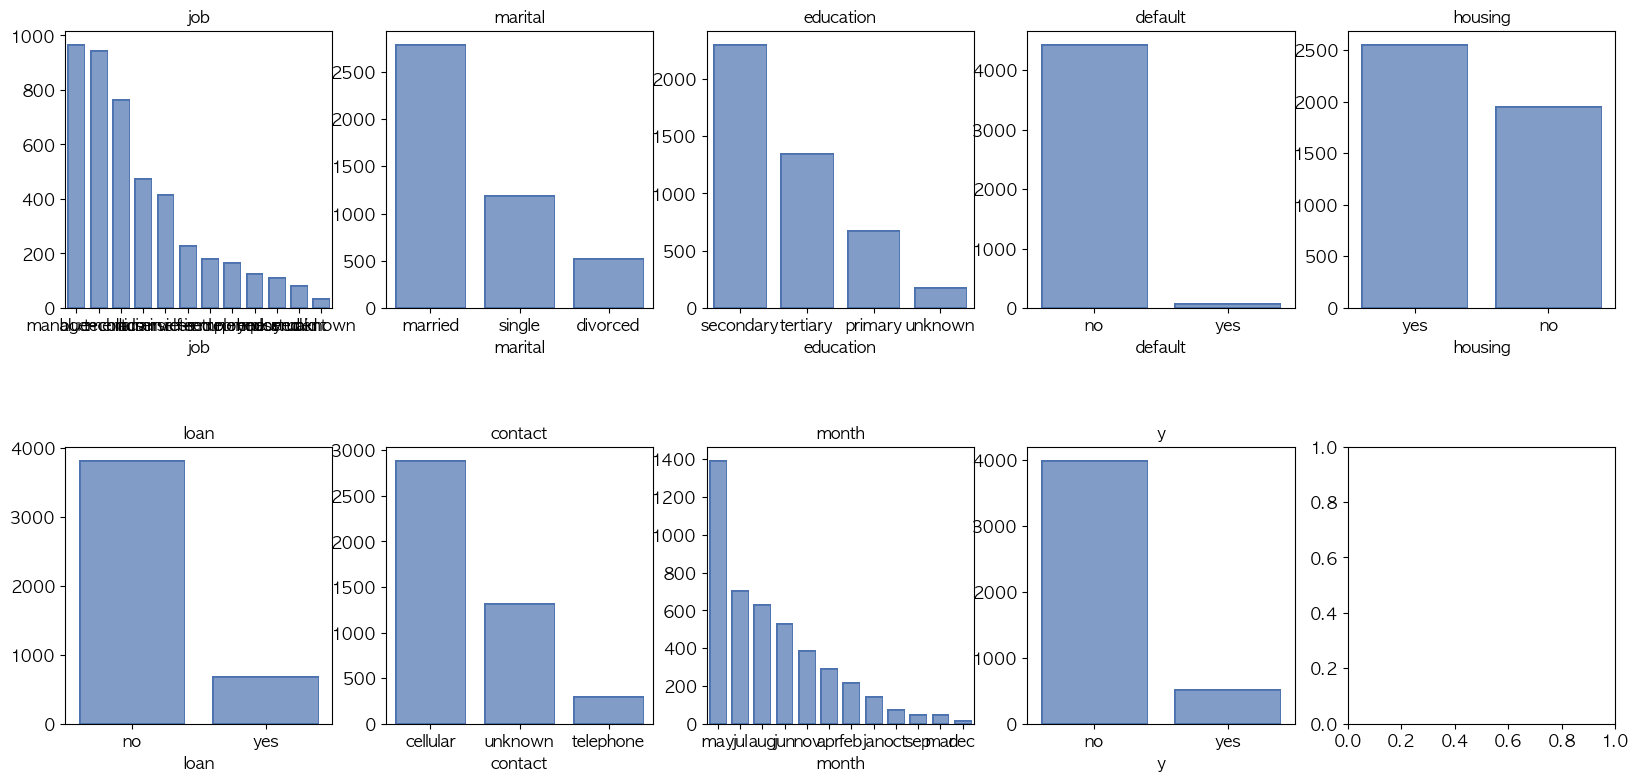

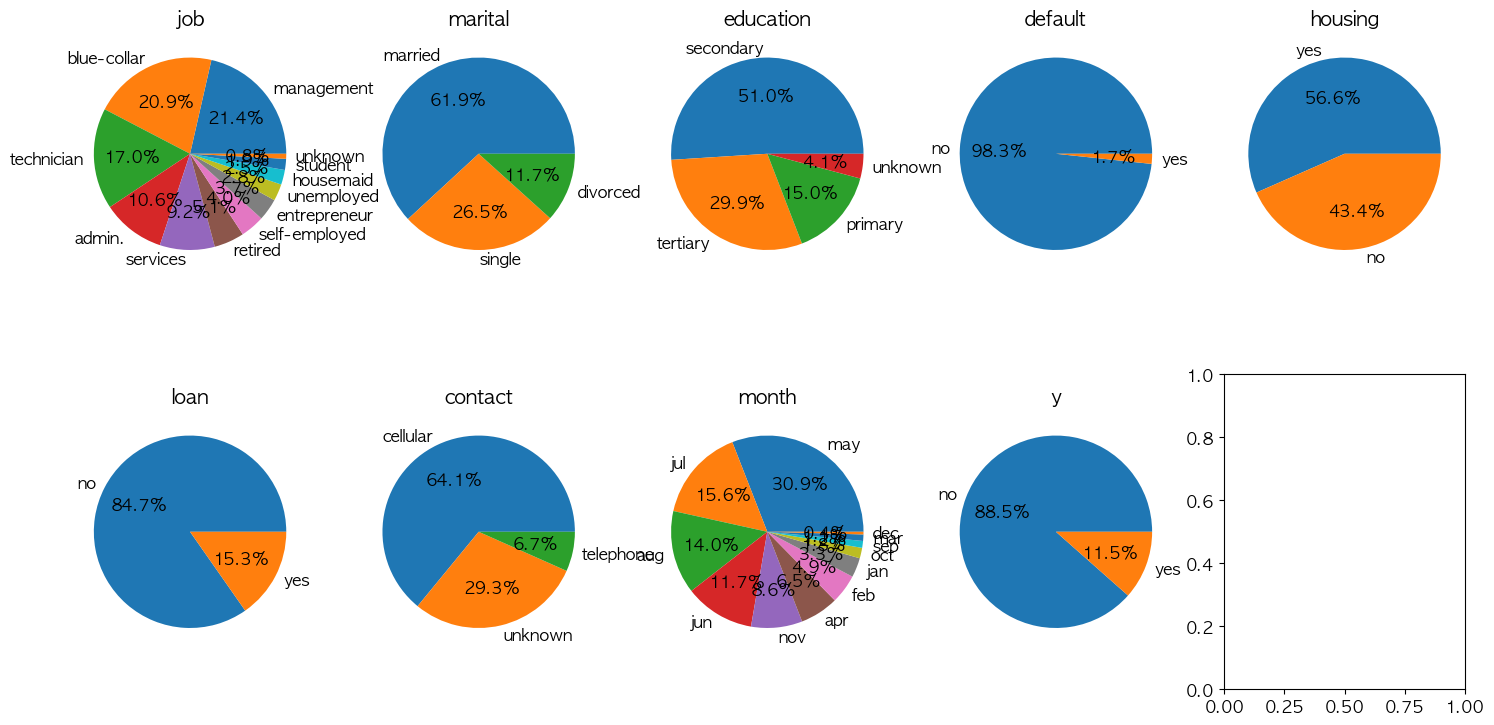

In [78]:
fig, axes = plt.subplots(2,5, figsize=(20,9))
plt.subplots_adjust(hspace=0.5)
for ax, feature in zip(axes.ravel(), qual_features):
    so.Plot(x=df[feature].value_counts().index, y=df[feature].value_counts().values).add(so.Bar()).label(title=feature).on(ax).plot()

fig, axes = plt.subplots(2,5, figsize=(18,9))
for ax, feature in zip(axes.ravel(), qual_features):
    ax.set_title(feature)
    table = df[feature].value_counts()
    ax.pie(table.values, labels=table.index, autopct="%.1f%%");
plt.show()